In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("amex_training.csv", low_memory=False)
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,10,0.63899,na,0,C,10,770,4,3080,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,13,0.63836,na,na,L,732,437,5,2185,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,1,1.00000,na,0,C,89,795,4,3180,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,3,0.53241,0,0,L,3,755,4,3020,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,1,0.92665,na,na,L,5,425,4,1700,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [56]:
for i in data.columns:
    print(data[i].unique())

[230032 230033 230034 ... 578066 578067 578068]
['1696' '1846' '1745' '1739' '1787' '1579' '1818' 'na' '1836' '1839'
 '1903' '1681' '1841' '1794' '1669' '1583' '1899' '1690' '1599' '1859'
 '1880' '1852' '1655' '1863' '1753' '1894' '1803' '1932' '1714' '1768'
 '1834' '1837' '1785' '1889' '1751' '1907' '1765' '1724' '1721' '1858'
 '1797' '1817' '1650' '1712' '1868' '1654' '1711' '1902' '1606' '1649'
 '1644' '1760' '1812' '1636' '1766' '1792' '1750' '1642' '1826' '1872'
 '1653' '1802' '1806' '1741' '1939' '1743' '1744' '1615' '1919' '1687'
 '1706' '1544' '1667' '1671' '1609' '1896' '1596' '1610' '1727' '1790'
 '1695' '1796' '1861' '1873' '1854' '1621' '1688' '1665' '1823' '1630'
 '1693' '1683' '1761' '1850' '1853' '1605' '1924' '1573' '1677' '1620'
 '1657' '1720' '1804' '1777' '1895' '1830' '1821' '1793' '1819' '1833'
 '1888' '1898' '1929' '1808' '1950' '1771' '1901' '1831' '1719' '1925'
 '1791' '1864' '1922' '1855' '1900' '1733' '1725' '1800' '1920' '1735'
 '1780' '1773' '1893' '1784' '1

In [57]:
#data.drop(['mvar16'], axis=1)

In [58]:
# data.columns = ['application_key', 'credit_score', 'credit_lender_score', 'default_loan', 'default_auto_loan', 'default_educ_loan', 'min_rev_credit_avail', 'max_act_credit_avail', 'max_act_rev_credit_avail', 'sum_avail_credit_miss1_payment', 'credit_available', '']

In [59]:
data = data.replace(to_replace = 'na', value = np.nan, regex = False)
data = data.replace(to_replace = 'missing', value = np.nan, regex = False)






data = data.replace(to_replace = '#VALUE!', value = -1, regex = False)

In [60]:
data.describe()

,application_key,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,mvar48,mvar49,default_ind
count,83000.000000,77114.000000,82465.000000,82465.000000,82465.000000,8.300000e+04,59538.000000,52332.000000,40689.000000,63470.000000,81131.000000,74851.000000,83000.000000,83000.000000,83000.000000
mean,318146.931060,1.054816,5.401784,0.461151,1.084012,1.894841e+05,57.302429,4347.490308,4241.010319,70.640478,6.983915,0.706595,556.021277,600.127494,0.287410
std,97179.489955,1.556682,11.091569,1.704292,5.743899,7.427382e+06,35.614851,3790.531813,3855.423204,333.609078,7.625562,0.245915,1106.953295,144.441805,0.452557
min,230032.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.117000,0.000000,0.000000,0.000000,0.083300,0.060660,2.000000,350.000000,0.000000
25%,250781.750000,0.131800,0.000000,0.000000,0.000000,4.261300e+04,26.277000,655.050000,490.000000,9.420000,1.250000,0.515280,8.000000,474.000000,0.000000
50%,271531.500000,0.513000,0.300000,0.000000,0.000000,7.234300e+04,58.905000,3844.675000,3611.110000,39.300000,3.916700,0.739500,17.000000,601.000000,0.000000
75%,362296.250000,1.386200,6.595000,0.000000,0.000000,1.189200e+05,86.100000,7473.407500,7412.030000,75.200000,10.583300,0.945120,111.000000,725.000000,1.000000
max,578068.000000,31.018100,399.334000,25.754000,165.492000,9.910000e+08,1305.250000,99800.000000,124533.330000,27867.400000,76.500000,1.000000,3247.000000,850.000000,1.000000


In [61]:
data.isnull().sum()

application_key        0
mvar1               3733
mvar2               5886
mvar3                535
mvar4                535
mvar5                535
mvar6              19701
mvar7               7674
mvar8              19709
mvar9              11682
mvar10               535
mvar11             46717
mvar12             14578
mvar13              9689
mvar14                 0
mvar15             33519
mvar16             19243
mvar17             16499
mvar18             15359
mvar19                 5
mvar20               535
mvar21             23462
mvar22             30668
mvar23             42311
mvar24             19530
mvar25              7862
mvar26             10929
mvar27             13650
mvar28               535
mvar29               535
mvar30             37988
mvar31             58539
mvar32              7862
mvar33              1869
mvar34               535
mvar35             34868
mvar36              3159
mvar37              7862
mvar38               535
mvar39              6329


In [62]:
col = ['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar48',
       'mvar49', 'mvar50', 'mvar51']
for i in col:
    data[i] = data[i].astype('float64')

<AxesSubplot:>

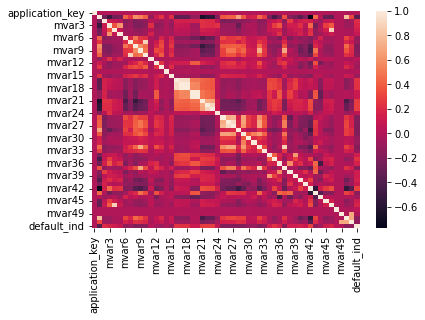

In [63]:
sns.heatmap(data.corr())

In [64]:
data["mvar22"].corr(data['mvar23'])

0.8945648407025415

<AxesSubplot:xlabel='count', ylabel='mvar47'>

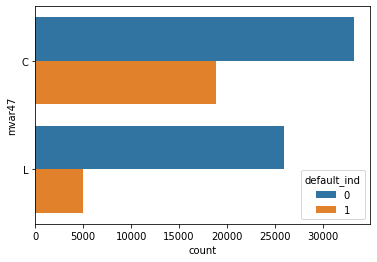

In [65]:
sns.countplot(y=data['mvar47'],hue=data['default_ind'])


In [66]:
lol = data.skew(axis = 1, skipna = True)

C:\Users\sejal\AppData\Local\Temp\ipykernel_9868\689791141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lol = data.skew(axis = 1, skipna = True)


In [67]:
data = data.fillna(data.std())

C:\Users\sejal\AppData\Local\Temp\ipykernel_9868\2780849940.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.std())


In [68]:

data = data.drop(['mvar18'],axis=1)

data = data.drop(['mvar19'],axis=1)
data = data.drop(["application_key","mvar48","mvar49","mvar22","mvar10","mvar17","mvar4","mvar10","mvar32"], axis =1)




In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
one_hot_encoded_data = pd.get_dummies(data, columns = ['mvar47'])
data = one_hot_encoded_data
X = data.drop(['default_ind'], axis=1)
Y = data['default_ind']

In [70]:
data

,mvar1,mvar2,mvar3,mvar5,mvar6,mvar7,mvar8,mvar9,mvar11,mvar12,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar50,mvar51,default_ind,mvar47_C,mvar47_L
0,1696.0,1.654100,0.000,0.0,0.000000,6015.0,322.000000,40369.000000,16975.671573,6423.000000,...,0.08696,10.0,0.63899,0.290383,0.000000,4.0,3080.0,0,1,0
1,1846.0,0.809500,0.000,0.0,102.000000,7532.0,3171.000000,18234.000000,16975.671573,765.000000,...,0.00000,13.0,0.63836,0.290383,0.329054,5.0,2185.0,1,0,1
2,1745.0,0.400100,0.000,0.0,3667.183981,2536.0,10060.346814,50673.150005,16975.671573,11505.727292,...,0.00000,1.0,1.00000,0.290383,0.000000,4.0,3180.0,1,1,0
3,1739.0,0.219300,0.000,0.0,1982.000000,26440.0,4955.000000,20316.000000,16975.671573,0.000000,...,0.15385,3.0,0.53241,0.000000,0.000000,4.0,3020.0,0,0,1
4,1787.0,0.011800,0.225,0.0,5451.000000,5494.0,5494.000000,7987.000000,16975.671573,2257.000000,...,0.00000,1.0,0.92665,0.290383,0.329054,4.0,1700.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,1748.0,0.304400,0.000,0.0,0.000000,20114.0,5574.000000,77386.000000,282.000000,48222.000000,...,0.04348,13.0,0.48002,0.000000,0.000000,4.0,2712.0,0,0,1
82996,1846.0,1.556682,0.000,0.0,793.000000,18608.0,18608.000000,63820.000000,16975.671573,7863.000000,...,0.00000,5.0,0.46925,0.290383,0.000000,5.0,3795.0,0,0,1
82997,1907.0,0.038100,0.000,0.0,2478.000000,24775.0,24775.000000,100294.000000,16975.671573,2968.000000,...,0.00000,19.0,0.67960,0.290383,0.000000,5.0,3620.0,0,0,1
82998,1744.0,1.830100,0.000,0.0,496.000000,917.0,496.000000,116164.000000,16975.671573,656.000000,...,0.09375,3.0,0.45317,0.290383,0.000000,4.0,2524.0,0,0,1


In [71]:
from sklearn.preprocessing import StandardScaler
# Scaling the test dataset
scaler = StandardScaler()

In [72]:
X.shape

(83000, 43)

In [73]:
from sklearn.decomposition import PCA
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 0)
from sklearn.impute import KNNImputer,SimpleImputer
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2)
#X_train, Y_train= sm.fit_resample(X_train, Y_train.ravel())

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
knn = KNNImputer(n_neighbors=3,weights='distance')


pca = PCA(n_components=40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [75]:
#import catboost as ctb
#model_CBC = ctb.CatBoostClassifier()
#model_CBC.fit(X_train, Y_train)
#Y_pred = model_CBC.predict(X_test)
#accuracy_score(Y_test,Y_pred)

In [76]:
accuracy_score(Y_test,Y_pred)

NameError: name 'Y_pred' is not defined

In [77]:
#from sklearn.svm import SVC
#sv = SVC()
#sv.fit(X_train,Y_train)
#Y_pred = sv.predict(X_test)
#accuracy_score(Y_test,Y_pred)

In [78]:
0.767078313253012

0.767078313253012

In [79]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import catboost as ctb
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.svm import SVC
import catboost as ctb
sv = SVC()

In [80]:
models = list()

decision_tree = Pipeline([('m', DecisionTreeClassifier())])
models.append(('decision', decision_tree))

randomforest = Pipeline([('m', RandomForestClassifier())])
models.append(('randomforest', randomforest))

xgb = Pipeline([('m', XGBClassifier(max_depth = 7, learning_rate=0.052000235))])
models.append(('xgb', xgb))

lgbm = Pipeline([('m', lgb.LGBMClassifier())])
models.append(('lgbm', lgbm))

nb = Pipeline([('m', GaussianNB())])
models.append(('nb', nb))

knn = Pipeline([('m', KNeighborsClassifier(n_neighbors=288))])
models.append(('knn', knn))

ctb = Pipeline([('m', ctb.CatBoostClassifier())])
models.append(('ctb', ctb))

svc = Pipeline([('m', SVC())])
models.append(('svc', svc))


ensemble = VotingClassifier(estimators=models, voting='hard')








In [81]:
models

[('decision', Pipeline(steps=[('m', DecisionTreeClassifier())])),
 ('randomforest', Pipeline(steps=[('m', RandomForestClassifier())])),
 ('xgb',
  Pipeline(steps=[('m',
                   XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 gamma=None, gpu_id=None, grow_policy=None,
                                 importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=0.052000235, max_bin=None,
                                 max_cat_to_onehot=None, max_delta_step=None,
                                 max_depth=7, max_leaves=None,
                                 min_child_weight=None, missing=nan,

In [82]:
ensemble

VotingClassifier(estimators=[('decision',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier())])),
                             ('randomforest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier())])),
                             ('xgb',
                              Pipeline(steps=[('m',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_rounds=None,
                                                             enable_catego...
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...))])),
                             ('lgbm',
                              Pipeline(steps=[('m', LGBMClassifier())])),
                             ('nb', Pipeline(steps=[('m', GaussianNB())])),
                             ('knn',
                              Pipeline(steps=[('m',
                                               KNeighborsClassifier(n_neighbors=288))])),
                             ('ctb',
                              Pipeline(steps=[('m',
                                               <catboost.core.CatBoostClassifier object at 0x000001F2598E3910>)])),
                             ('svc', Pipeline(steps=[('m', SVC())]))])

In [83]:
ensemble.fit(X_train,Y_train)

Learning rate set to 0.054658
0:	learn: 0.6731864	total: 174ms	remaining: 2m 53s
1:	learn: 0.6550337	total: 192ms	remaining: 1m 35s
2:	learn: 0.6383510	total: 210ms	remaining: 1m 9s
3:	learn: 0.6237341	total: 228ms	remaining: 56.8s
4:	learn: 0.6102183	total: 246ms	remaining: 49s
5:	learn: 0.5994632	total: 263ms	remaining: 43.5s
6:	learn: 0.5890029	total: 280ms	remaining: 39.7s
7:	learn: 0.5805788	total: 298ms	remaining: 37s
8:	learn: 0.5720035	total: 316ms	remaining: 34.8s
9:	learn: 0.5649153	total: 334ms	remaining: 33.1s
10:	learn: 0.5589643	total: 363ms	remaining: 32.6s
11:	learn: 0.5539079	total: 383ms	remaining: 31.5s
12:	learn: 0.5484776	total: 404ms	remaining: 30.7s
13:	learn: 0.5433394	total: 421ms	remaining: 29.7s
14:	learn: 0.5392649	total: 440ms	remaining: 28.9s
15:	learn: 0.5354903	total: 458ms	remaining: 28.2s
16:	learn: 0.5318254	total: 477ms	remaining: 27.6s
17:	learn: 0.5291607	total: 496ms	remaining: 27s
18:	learn: 0.5263935	total: 514ms	remaining: 26.6s
19:	learn: 0.52

VotingClassifier(estimators=[('decision',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier())])),
                             ('randomforest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier())])),
                             ('xgb',
                              Pipeline(steps=[('m',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_rounds=None,
                                                             enable_catego...
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...))])),
                             ('lgbm',
                              Pipeline(steps=[('m', LGBMClassifier())])),
                             ('nb', Pipeline(steps=[('m', GaussianNB())])),
                             ('knn',
                              Pipeline(steps=[('m',
                                               KNeighborsClassifier(n_neighbors=288))])),
                             ('ctb',
                              Pipeline(steps=[('m',
                                               <catboost.core.CatBoostClassifier object at 0x000001F2598E3910>)])),
                             ('svc', Pipeline(steps=[('m', SVC())]))])

In [84]:
Y_pred = ensemble.predict(X_test)


In [85]:
accuracy_score(Y_test,Y_pred)

0.7684337349397591

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(ensemble, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
kf=KFold(n_splits=5)

In [ ]:
score=cross_val_score(ensemble,X_train,Y_train,cv=kf)

In [ ]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

In [41]:
# import autosklearn.classification
# cls = autosklearn.classification.AutoSklearnClassifier()
# cls.fit(X_train, y_train)
# predictions = cls.predict(X_test)





#import lightgbm as lgb
#clf = lgb.LGBMClassifier()
#clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)

#from sklearn.ensemble import RandomForestClassifier
#rnd = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#rnd.fit(X_train, Y_train)
#Y_pred = rnd.predict(X_test)

#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#model.fit(X_train, Y_train)
#Y_pred = model.predict(X_test)

#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(X_train, Y_train)
#Y_pred = nb.predict(X_test)

#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=288)
#knn.fit(X_train, Y_train)
#Y_pred = knn.predict(X_test)

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 7, learning_rate=0.052000235)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

#import catboost as ctb
#model_CBC = ctb.CatBoostClassifier()
#model_CBC.fit(X_train, Y_train)
#Y_pred = model_CBC.predict(X_test)

#from sklearn.neural_network import MLPClassifier
#NN = MLPClassifier()
#NN.fit(X_train, Y_train)
#Y_pred = NN.predict(X_test)

In [42]:
accuracy_score(Y_test,Y_pred)

0.7666566265060241

In [43]:
0.7670481927710844  0.7677108433734939

SyntaxError: invalid syntax (2810062113.py, line 1)

# TEST DATA PRE PROCESSING


In [ ]:
## Test evaluation

test_data = pd.read_csv('amex_testt.csv', low_memory=False)

# # Predicting the test se"t on the best model according to training model
# model=LogisticRegression()
# #model=RandomForestClassifier(max_depth=16,random_state=0)
# #model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0)
# #model=GaussianNB()

In [ ]:
test_data = test_data.replace(to_replace = 'na', value = np.nan, regex = False)
test_data = test_data.replace(to_replace = 'missing', value = np.nan, regex = False)
test_data = test_data.replace(to_replace = '#VALUE!', value = -1, regex = False)

# test_data = test_data.fillna(0)
test_data = test_data.fillna(test_data.std())

In [ ]:
test_data1 = test_data

In [ ]:
for i in col:
    test_data[i] = test_data[i].astype('float64')
# test_data = test_data.fillna(0)
test_data = test_data.fillna(test_data.mean())

In [ ]:
test_data['mvar47'] = np.where(test_data['mvar47'] == 'C', 0, 1)
test_data_new = test_data.drop(['application_key'], axis=1)
# Scaling the test dataset
scaler = StandardScaler()
test_data_new = scaler.fit_transform(test_data_new)

In [ ]:

pca = PCA(n_components=40)
test_data = pca.fit_transform(test_data_new)

In [ ]:
pred =ensemble.predict(test_data)
pred = pred.astype('int32')
# Formation of csv file containing the predicted values
Y_testing = pd.DataFrame(pred, columns=['Predicted'])


In [ ]:
Y_testing = pd.DataFrame(pred, columns=['Predicted'])
result = pd.concat([test_data1['application_key'], Y_testing], join='outer', axis=1)
print(result)

In [ ]:
result

In [ ]:

result.to_csv('PPKS_10.csv', index=False, header=False)

In [ ]:
test_data

In [ ]:
result